**Oбучение с подкреплением: задача о "многоруком бандите"**

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
import numpy as np
from numpy import random as rng
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

np.set_printoptions(precision=3)

In [2]:
# определяем "многорукого бандита"

# вероятности выйгрыша для каждого выбора
p_bandit = [ .55, .2, .81, .3, .35,  .70,  ] 

def pull(a,p_bandit=p_bandit): # играем вариант 'a'
    return int( rng.rand() < p_bandit[a])


In [3]:
# одна игра
def game(
        p, # стратегия выбора
        p_bandit=p_bandit, # параметры распределений среды
        n_iter=5, # количество поппыток
        R = np.zeros(len(p_bandit),dtype=np.float32), # суммарные "награды" за действия
        N = np.zeros(len(p_bandit),dtype=np.int32), # количество попыток применить действия
    ):
    
    E = 0 # количесво ошибок за игру
    Q = R/(N+1) # оценка выйгрыша от действия
        
    for i in range(n_iter):
        action = rng.randint(len(R)) if N.sum()<1 else p(Q)  #  выбираем действие
        reward = pull(action,p_bandit) # применяем действие
        N[action] += 1 # увеличиваем счётчик выбора действия
        R[action] += reward # сумарный выйгрыш действия
        Q[action] = R[action]/(N[action]+1) # оценка выйгрыша от действия
        E += (reward<=0) # количество неудачных попыток (нет выйгрыша)
    
    return (R,N,E/n_iter)

In [4]:
def evaluate(
        p, # стратегия выбора
        bandit=p_bandit, # параметры распределений среды
        n_epoch=10, # количество игр
        n_iter=5, # шагов игры
    ):
    
    # начальная статистика
    # R = np.ones(len(p_bandit),dtype=np.float32)/len(p_bandit) # суммарный выйгрыш от действия
    R = np.zeros(len(p_bandit),dtype=np.int32) # суммарный выйгрыш от действия
    N = np.zeros(len(p_bandit),dtype=np.int32) # количество попыток применить действие
    
    mean_error = [] # среднее количество ошибок за игру
    mean_reward = [] 
    
    for i in tqdm(range(n_epoch)):
        R,N,E = game( p, p_bandit=p_bandit, n_iter=n_iter,R=R,N=N )
        mean_error.append(E)
            
    print('средний выйгрыш: %.3f'%( R.sum()/(n_iter*n_epoch) ) )
    print('средняя погрешность: %.3f'%( sum(mean_error)/n_epoch ) )

    fig = plt.figure(figsize=(15,3))
    plt.plot(mean_error,label='% error',c='r')
    plt.ylim([0.,1.])
    plt.grid()
    plt.legend()

#     return mean_error,mean_reward

In [5]:
n_epoch=2500

  0%|          | 0/2500 [00:00<?, ?it/s]

средний выйгрыш: 0.487
средняя погрешность: 0.513


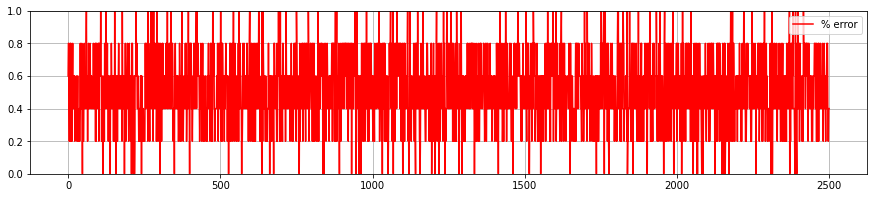

In [6]:
def p_random(Q):
    n_action = len(Q)
    return rng.randint(n_action)

evaluate( p_random, n_epoch=n_epoch,  )

  0%|          | 0/2500 [00:00<?, ?it/s]

средний выйгрыш: 0.553
средняя погрешность: 0.447


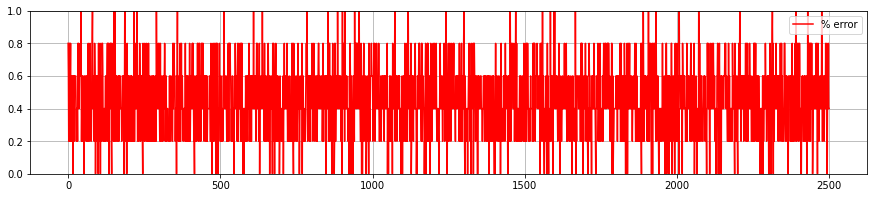

In [7]:
# простая "жадная" стратегия
def p_greedy(Q):
    return np.argmax(Q)

evaluate( p_greedy, n_epoch=n_epoch,  )

  0%|          | 0/2500 [00:00<?, ?it/s]

средний выйгрыш: 0.810
средняя погрешность: 0.190


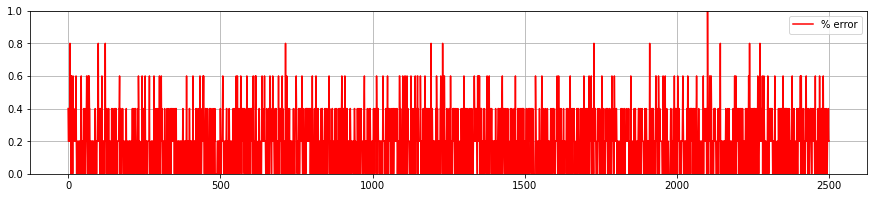

In [8]:
# "E-жадная" стратегия
def p_e_greedy(Q,e=.01):
    n_action = len(Q)
    if rng.rand()<e : return rng.randint(n_action)
    return np.argmax(Q)

evaluate( p_e_greedy, n_epoch=n_epoch,  )

  0%|          | 0/2500 [00:00<?, ?it/s]

средний выйгрыш: 0.681
средняя погрешность: 0.319


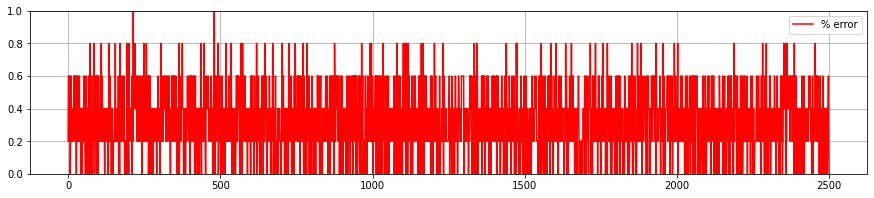

In [11]:
# Softmax стратегия
from scipy.special import softmax

def p_softmax(Q,t=.1):
    n_action = len(Q)
    sQ = softmax(Q/t) 
    return np.argmax( (rng.rand(n_action)<sQ) * sQ )  

evaluate( p_softmax, n_epoch=n_epoch,  )

In [10]:
# !pip3 install watermark
# Python package versions used
%load_ext watermark
%watermark --python
%watermark --iversions
#

Python implementation: CPython
Python version       : 3.8.9
IPython version      : 8.0.1

numpy     : 1.22.2
matplotlib: 3.5.1

